Fundamentos teóricos de LLMs

Notebook de apoyo con **2 ejercicios en Python** para hacer durante la clase:

1. Laboratorio de **tokenización comparada**.
2. Laboratorio de **Multi-Head Attention en PyTorch** (shapes y matriz de atención).

Todo el código usa solo librerías open source.

In [1]:
%pip install -q transformers torch matplotlib protobuf
!pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Ejercicio 1 – Tokenización comparada

**Objetivo:** ver cómo distintos modelos tokenizan el mismo texto y cómo cambia el número de tokens.

**Requisitos:**
- Python 3
- Librería `transformers` instalada (`pip install transformers`).

In [2]:
from transformers import AutoTokenizer

# Cargamos tres tokenizadores representativos
tok_gpt2 = AutoTokenizer.from_pretrained('gpt2')  # BPE (decoder-only)
tok_bert = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')  # WordPiece (encoder)
# Usamos use_fast=False para mT5 para evitar problemas con protobuf en algunos entornos
tok_mt5  = AutoTokenizer.from_pretrained('google/mt5-small', use_fast=False)  # SentencePiece (encoder-decoder)


C:\Users\balle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\balle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\balle\.cache\huggingface\hub\models--google--mt5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub

In [3]:
def show_tokens(text, tokenizer, name):
    ids = tokenizer.encode(text)
    toks = tokenizer.convert_ids_to_tokens(ids)
    print(f"\n=== {name} ===")
    print('Texto: ', text)
    print('Tokens:', toks)
    print('Num tokens:', len(toks))


### 1.1. Ejemplos guiados

Ejecuta la siguiente celda para ver cómo tokeniza cada modelo varios textos de ejemplo.

In [4]:
ejemplos = [
    'Hola, ¿cómo estás?',
    'Este máster de IA generativa está siendo increíble.',
    'for i in range(10): print(i)',
    'Hestoy escriviendo maal a pos ta.', # Lo siento por los ojos de quien lo lea :)
]

for text in ejemplos:
    show_tokens(text, tok_gpt2, 'GPT-2 (BPE)')
    show_tokens(text, tok_bert, 'BERT m-cased (WordPiece)')
    show_tokens(text, tok_mt5,  'mT5 (SentencePiece)')



=== GPT-2 (BPE) ===
Texto:  Hola, ¿cómo estás?
Tokens: ['H', 'ola', ',', 'ĠÂ', '¿', 'c', 'Ã³', 'mo', 'Ġest', 'Ã¡s', '?']
Num tokens: 11

=== BERT m-cased (WordPiece) ===
Texto:  Hola, ¿cómo estás?
Tokens: ['[CLS]', 'Ho', '##la', ',', '¿', 'cómo', 'está', '##s', '?', '[SEP]']
Num tokens: 10

=== mT5 (SentencePiece) ===
Texto:  Hola, ¿cómo estás?
Tokens: ['▁Hola', ',', '▁¿', 'cóm', 'o', '▁está', 's', '?', '</s>']
Num tokens: 9

=== GPT-2 (BPE) ===
Texto:  Este máster de IA generativa está siendo increíble.
Tokens: ['E', 'ste', 'Ġm', 'Ã¡', 'ster', 'Ġde', 'ĠIA', 'Ġgener', 'at', 'iva', 'Ġest', 'Ã¡', 'Ġsi', 'endo', 'Ġincre', 'ÃŃ', 'ble', '.']
Num tokens: 18

=== BERT m-cased (WordPiece) ===
Texto:  Este máster de IA generativa está siendo increíble.
Tokens: ['[CLS]', 'Este', 'más', '##ter', 'de', 'IA', 'genera', '##tiva', 'está', 'siendo', 'in', '##cre', '##í', '##ble', '.', '[SEP]']
Num tokens: 16

=== mT5 (SentencePiece) ===
Texto:  Este máster de IA generativa está siendo increíble.
Toke

### 1.2. Actividad

1. Añade tus propios ejemplos de texto (con emojis, faltas, código, varios idiomas...).
2. Señala al menos **un caso** donde un modelo use muchos más tokens que otro.
3. Relaciona lo que ves con:
   - Coste por tokens.
   - Límite de contexto.


---

## Ejercicio 2 – Shapes en Multi-Head Attention de PyTorch

**Objetivo:** familiarizarse con las dimensiones (shapes) de los tensores en `nn.MultiheadAttention` y conectarlas con la teoría.

**Requisitos:**
- `torch` (`pip install torch`)
- `matplotlib` (`pip install matplotlib`).

In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.manual_seed(0)

embed_dim = 16
num_heads = 2
seq_len = 5

mha = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)

# Un batch con una sola secuencia
x = torch.randn(1, seq_len, embed_dim)  # (batch, seq, dim)
# average_attn_weights=False para obtener todas las cabezas por separado
out, attn_weights = mha(x, x, x, average_attn_weights=False)       # self-attention

print('x:', x.shape)
print('out:', out.shape)
print('attn_weights:', attn_weights.shape)


x: torch.Size([1, 5, 16])
out: torch.Size([1, 5, 16])
attn_weights: torch.Size([1, 2, 5, 5])


Comenta con tu grupo:

- ¿Qué representa cada dimensión de `x`, `out` y `attn_weights`?
- ¿Dónde está el número de cabezas en `attn_weights`?

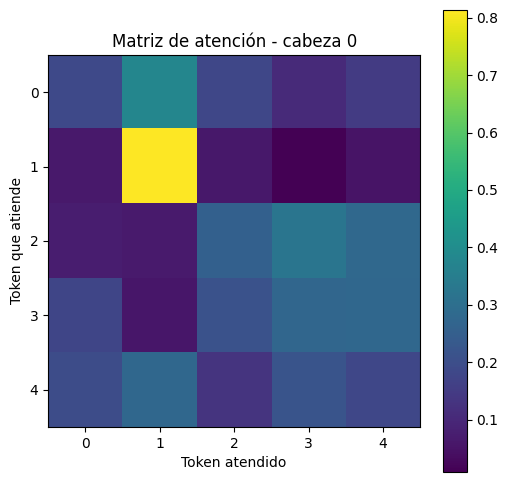

In [6]:
# Visualizamos la matriz de atención de una cabeza
head = 0
# attn_weights tiene shape (batch, num_heads, seq_len, seq_len) cuando average_attn_weights=False
attn = attn_weights[0, head].detach().numpy()  # (seq, seq)

plt.figure(figsize=(6, 6))
plt.imshow(attn, cmap='viridis')
plt.colorbar()
plt.xlabel('Token atendido')
plt.ylabel('Token que atiende')
plt.title('Matriz de atención - cabeza 0')
plt.show()


### 2.1. Variaciones sugeridas

1. Cambia `seq_len` y vuelve a ejecutar: ¿cómo cambian los shapes?
2. Cambia `num_heads` a 4: ¿qué ocurre con `attn_weights`?
3. Añade una segunda secuencia al batch (batch size = 2) y verifica los shapes de nuevo.

Piensa cómo se relaciona esto con la explicación de **multi-head attention** de la clase.